In [1]:
#import warnings
warnings.filterwarnings('ignore')

In [101]:
#pip install ipython-autotime

Note: you may need to restart the kernel to use updated packages.


In [3]:
#%load_ext autotime

time: 0 ns (started: 2023-05-06 17:17:32 -05:00)


In [4]:
#conda install -c anaconda py-xgboost

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\Usuario\anaconda3\envs\MIAD

  added / updated specs:
    - py-xgboost


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2023.01.10 |       haa95532_0         158 KB  anaconda
    certifi-2022.12.7          |   py39haa95532_0         153 KB  anaconda
    ------------------------------------------------------------
                                           Total:         310 KB

The following packages will be SUPERSEDED by a higher-priority channel:

  ca-certificates                                 pkgs/main --> anaconda None
  certifi                                         pkgs/main --> anaconda None
  openssl              pkgs/main::openssl-1.1.1t-h2bbff1b_0 --> anaconda::openssl-1.1.1s-h2bbff1b_0 None




certifi-2022.12.7    | 153 KB    |            |   0% 
certifi-2022.12.

In [145]:
#conda install seaborn

In [146]:
# Importación librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgboost
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import cross_val_score
import math

#from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score
from sklearn.metrics import auc
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
import itertools

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek
from imblearn.ensemble import BalancedBaggingClassifier

from collections import Counter

In [147]:
# Carga de datos de archivos .csv
url = 'SECOP I filtro.txt'
secop1 = pd.read_csv(url, delimiter='|', dtype='str')

# Selecciona las columnas seleccionadas en el preprocesamiento
columnasSeleccionadas = ['UID', #1
                         'Anno Cargue SECOP', #2
                         'Anno Firma Contrato', #3
                         'Nivel Entidad', #4
                         'Orden Entidad', #5
                         'Nombre Entidad', #6
                         'NIT de la Entidad', #7
                         'Código de la Entidad', #8
                         'ID Modalidad', #9
                         'Modalidad de Contratacion', #10
                         'Estado del Proceso', #11
                         'ID Objeto a Contratar', #15
                         'Objeto a Contratar', #16
                         'Detalle del Objeto a Contratar', #17
                         'Municipio de Obtencion', #19
                         'Municipio de Entrega', #20
                         'Numero de Constancia', #23
                         'Numero de Proceso', #24
                         'Numero de Contrato', #25
                         'Cuantia Proceso', #26
                         'ID Grupo', #27
                         'Nombre Grupo', #28
                         'ID Familia', #29
                         'Nombre Familia', #30
                         'ID Clase', #31
                         'Nombre Clase', #32
                         'ID Adjudicacion', #33
                         'Tipo Identifi del Contratista', #34
                         'Identificacion del Contratista', #35
                         'Nom Razon Social Contratista', #36
                         'Dpto y Muni Contratista', #37
                         'Identific Representante Legal', #39
                         'Nombre del Represen Legal', #40
                         'Fecha de Firma del Contrato', #41
                         'Fecha Ini Ejec Contrato', #42
                         'Plazo de Ejec del Contrato', #43
                         'Rango de Ejec del Contrato', #44
                         'Tiempo Adiciones en Dias', #45
                         'Tiempo Adiciones en Meses', #46
                         'Fecha Fin Ejec Contrato', #47
                         'Cuantia Contrato', #49
                         'Valor Total de Adiciones', #50
                         'Valor Contrato con Adiciones', #51
                         'Objeto del Contrato a la Firma', #52
                         'Proponentes Seleccionados', #53
                         'Calificacion Definitiva', #54
                         'Es PostConflicto', #59
                         'Municipio Entidad', #67
                         'Departamento Entidad', #68
                         'Ultima Actualizacion', #69
                         'Fecha Liquidacion', #70
                         'Cumple Decreto 248', #71
                         'IncluyeBienesDecreto248' #72
                         ]


# Imputa valores NA
secop1['Fecha Ini Ejec Contrato'] = secop1['Fecha Ini Ejec Contrato'].fillna(secop1['Fecha de Cargue en el SECOP'])
#secop1['Cuantía Contrato'] = secop1['Cuantía Contrato'].fillna(secop1['Cuantía Proceso'])

# Cambia el tipo de las columnas numericas
columnasNumero = ['Cuantia Proceso', #26
                  'Plazo de Ejec del Contrato', #43
                  'Tiempo Adiciones en Dias', #45 ? sobra
                  'Tiempo Adiciones en Meses', #46 ? sobra
                  'Cuantia Contrato', #49
                  'Valor Total de Adiciones', #50 ? sobra
                  'Valor Contrato con Adiciones' #51 ? sobra
                  ]
secop1[columnasNumero] = secop1[columnasNumero].astype('int64')

# Convierte a formato fecha
#secop1['Ultima Actualizacion'] = pd.to_datetime(secop1['Ultima Actualizacion'], format='%d/%m/%Y')
secop1['Fecha Ini Ejec Contrato'] = pd.to_datetime(secop1['Fecha Ini Ejec Contrato'], format='%d/%m/%Y')
# Extrae año y mes
secop1['Anno Ini Ejec Contrato'] = secop1['Fecha Ini Ejec Contrato'].dt.year
secop1['Mes Ini Ejec Contrato'] = secop1['Fecha Ini Ejec Contrato'].dt.month

# Convierte años de 0 a 4 segun su posicion en cuetrenios desde 2016
secop1['Anno Ini Ejec Contrato'] = (secop1['Anno Ini Ejec Contrato']-2016)%4


# Crea Prorroga y Adicion
#secop1['Prorroga'] = secop1['Tiempo Adiciones en Dias'].apply(lambda x: 'Prorrogado' if x != 0 else 'No Prorrogado')
secop1['Prorroga'] = secop1['Tiempo Adiciones en Dias'] + secop1['Tiempo Adiciones en Meses']
secop1['Prorroga'] = secop1['Prorroga'].apply(lambda x: 1 if x != 0 else 0)
#secop1['Adicion'] = secop1['Valor Total de Adiciones'].apply(lambda x: 'Adicionado' if x != 0 else 'No Adicionado')
secop1['Adicion'] = secop1['Valor Total de Adiciones'].apply(lambda x: 1 if x != 0 else 0)


# Selecciona las columnas seleccionadas en el feature engineering
columnasSeleccionadas = ['Orden Entidad', #5
                         'Modalidad de Contratacion', #10
                         'Estado del Proceso', #11 adicional
                         #'Nombre Regimen de Contratacion', #14 ? igual que modalidad
                         'Objeto a Contratar', #16
                         'Municipio de Obtencion', #19
                         #'Anno de Cargue en el SECOP', #22 ?
                         #'Mes de Cargue en el SECOP', #22 ?
                         'Cuantia Proceso', #26
                         'Nombre Grupo', #28
                         'Tipo Identifi del Contratista', #34
                         'Dpto y Muni Contratista', #37
                         'Anno Ini Ejec Contrato', #42
                         'Mes Ini Ejec Contrato', # 42
                         'Plazo de Ejec del Contrato', #43
                         'Rango de Ejec del Contrato', #44
                         'Prorroga', #45 y 46
                         'Tiempo Adiciones en Dias', #45 ? perdida de informacion
                         'Tiempo Adiciones en Meses', #46 ? perdida de informacion
                         'Cuantia Contrato', #49
                         'Adicion', #50
                         'Valor Total de Adiciones', #50 ? sobra
                         'Valor Contrato con Adiciones', #51 ? sobra
                         #'Proponentes Seleccionados', #53
                         'Departamento Entidad' #68
                         ]

secop1 = secop1[columnasSeleccionadas]

# Codificar las columnas categoricas
#secop1['Nivel Entidad'] = pd.factorize(secop1['Nivel Entidad'])[0]
secop1['Orden Entidad'] = pd.factorize(secop1['Orden Entidad'])[0] #5
secop1['Modalidad de Contratacion'] = pd.factorize(secop1['Modalidad de Contratacion'])[0] #10
secop1['Estado del Proceso'] = pd.factorize(secop1['Estado del Proceso'])[0] #11
secop1['Municipio de Obtencion'] = pd.factorize(secop1['Municipio de Obtencion'])[0] #11
secop1['Nombre Grupo'] = pd.factorize(secop1['Nombre Grupo'])[0] #28
secop1['Tipo Identifi del Contratista'] = pd.factorize(secop1['Tipo Identifi del Contratista'])[0] #34
secop1['Dpto y Muni Contratista'] = pd.factorize(secop1['Dpto y Muni Contratista'])[0] #37
secop1['Rango de Ejec del Contrato'] = pd.factorize(secop1['Rango de Ejec del Contrato'])[0] #44
#secop1['Municipio Entidad'] = pd.factorize(secop1['Municipio Entidad'])[0]
secop1['Departamento Entidad'] = pd.factorize(secop1['Departamento Entidad'])[0] #68
#secop1['Prorroga'] = pd.factorize(secop1['Prorroga'])[0]
#secop1['Adicion'] = pd.factorize(secop1['Adicion'])[0]

# Eliminación filas con observaciones nulas
#secop1.dropna(inplace=True)
#secop1.head()

In [148]:
secop1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135821 entries, 0 to 135820
Data columns (total 21 columns):
 #   Column                         Non-Null Count   Dtype 
---  ------                         --------------   ----- 
 0   Orden Entidad                  135821 non-null  int64 
 1   Modalidad de Contratacion      135821 non-null  int64 
 2   Estado del Proceso             135821 non-null  int64 
 3   Objeto a Contratar             135821 non-null  object
 4   Municipio de Obtencion         135821 non-null  int64 
 5   Cuantia Proceso                135821 non-null  int64 
 6   Nombre Grupo                   135821 non-null  int64 
 7   Tipo Identifi del Contratista  135821 non-null  int64 
 8   Dpto y Muni Contratista        135821 non-null  int64 
 9   Anno Ini Ejec Contrato         135821 non-null  int64 
 10  Mes Ini Ejec Contrato          135821 non-null  int64 
 11  Plazo de Ejec del Contrato     135821 non-null  int64 
 12  Rango de Ejec del Contrato     135821 non-nu

In [149]:
# Selección de variables predictoras
feature_cols = ['Orden Entidad',
                'Modalidad de Contratacion',
                'Estado del Proceso',
                #'Objeto a Contratar',
                'Municipio de Obtencion',
                'Cuantia Proceso',
                'Nombre Grupo',
                'Tipo Identifi del Contratista',
                'Dpto y Muni Contratista',
                'Anno Ini Ejec Contrato',
                'Mes Ini Ejec Contrato',
                'Plazo de Ejec del Contrato',
                'Rango de Ejec del Contrato',
                #'Prorroga',
                #'Tiempo Adiciones en Dias',
                #'Tiempo Adiciones en Meses',
                'Cuantia Contrato',
                #'Adicion',
                #'Valor Total de Adiciones',
                #'Valor Contrato con Adiciones',
                'Departamento Entidad'
                ]

# Separación de variables predictoras (X) y variable de interes (y)
#secop1sample = secop1.sample(30000) # Se incia con un sample de 20k de los 135k registros
X = secop1[feature_cols]
y = (secop1['Adicion'])

# Separación de variables predictoras (X) y variable de interés (y) en set de entrenamiento y test usandola función train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=40, stratify=y)
print('Train:', y_train.shape[0], '\ny_train:')
print(y_train.value_counts())
print('\nTest:', y_test.shape[0], '\ny_test:')
print(y_test.value_counts())

Train: 91000 
y_train:
0    81838
1     9162
Name: Adicion, dtype: int64

Test: 44821 
y_test:
0    40309
1     4512
Name: Adicion, dtype: int64


In [150]:
# Funcion para mostrar los resultados
def mostrar_resultados(y_test, y_pred):
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 6))
    ConfusionMatrixDisplay(conf_matrix).plot()
    plt.title("Confusion matrix")
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()
    print (classification_report(y_test, y_pred))

# XGB Regressor Calibration Full

## Paso 0 : Definición inicial de Parámetros

In [151]:
base_score = None
booster = None
colsample_bylevel = None
colsample_bynode = None
enable_categorical = False
importance_type=None
interaction_constraints=None
max_delta_step=None

objective = 'binary:logistic'
eval_metric = "logloss"

learning_rate=None
max_depth = 6
n_estimators=100
colsample_bytree = 1
gamma = 0
min_child_weight = 1
reg_alpha=None
reg_lambda=None
subsample = 1

random_state=1
silent = 0
seed = 0
verbosity=0

## Paso 1: Calibración de max_depth y min_child_weight

In [152]:
parameters = {}
parameters['max_depth'] = max_depth
parameters['min_child_weight']= min_child_weight
parameters['gamma'] = gamma
parameters['subsample']= subsample
parameters['colsample_bytree']= colsample_bytree
parameters['reg_alpha'] = reg_alpha
parameters['reg_lambda'] = reg_lambda
parameters['learning_rate'] = learning_rate
parameters['n_estimators'] = n_estimators

scores = []

cv_params = {'max_depth':range(3,10,2),  # Valor entre 3 y 10.
             'min_child_weight': [1,3,5]
            }

gbm = GridSearchCV(XGBClassifier(
                                        objective = objective,
                                        seed = seed,
                                        n_estimators = n_estimators,
                                        learning_rate = learning_rate,
                                        gamma = gamma,
                                        subsample = subsample,
                                        colsample_bytree = colsample_bytree,
                                        reg_alpha = reg_alpha,
                                        reg_lambda = reg_lambda,
                                        verbosity = verbosity,
                                        eval_metric = eval_metric,
                                        random_state=random_state
                                    ),
                    
                    param_grid = cv_params,
                    scoring = 'recall',
                    cv = 5,
                    verbose = False
)

gbm.fit(X_train, y_train)
print(gbm.cv_results_)
print("Best parameters %s" %gbm.best_params_)
print("Best score %s" %gbm.best_score_)

C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass 

C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass 

C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass 

C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass 

C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass 

C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass 

{'mean_fit_time': array([1.40033998, 1.41510191, 1.41978145, 2.26510086, 2.22360282,
       2.27334361, 3.32242002, 3.28851738, 3.2193542 , 4.70693159,
       4.26301618, 4.07284636]), 'std_fit_time': array([0.07011794, 0.04690563, 0.03118707, 0.02599067, 0.0318774 ,
       0.03799994, 0.03466213, 0.0533616 , 0.02186391, 0.47587888,
       0.11744912, 0.06589551]), 'mean_score_time': array([0.01511064, 0.01660676, 0.014012  , 0.01780424, 0.01840725,
       0.01730471, 0.0236711 , 0.02250862, 0.02254157, 0.02594552,
       0.02640524, 0.02701893]), 'std_score_time': array([0.00066455, 0.00371997, 0.00088425, 0.00159986, 0.0012016 ,
       0.00132591, 0.00168581, 0.00134199, 0.00184444, 0.00091664,
       0.00102164, 0.00110094]), 'param_max_depth': masked_array(data=[3, 3, 3, 5, 5, 5, 7, 7, 7, 9, 9, 9],
             mask=[False, False, False, False, False, False, False, False,
                   False, False, False, False],
       fill_value='?',
            dtype=object), 'param_min_ch

### Estable óptimos temporales max_depth y min_child_weight

In [153]:
max_depth = gbm.best_params_['max_depth']
min_child_weight = gbm.best_params_['min_child_weight']
parameters['max_depth'] = max_depth
parameters['min_child_weight'] = min_child_weight
scores.append(gbm.best_score_)

### Calibración de max_depth y min_child_weight con grilla detallada

In [154]:
cv_params = {'max_depth': [max_depth-1, max_depth, max_depth+1], 
             'min_child_weight': [min_child_weight-1, min_child_weight-0.5, min_child_weight, min_child_weight+0.5, min_child_weight+1]
            }

gbm = GridSearchCV(XGBClassifier(
                                        objective = objective,
                                        seed = seed,
                                        n_estimators = n_estimators,
                                        learning_rate = learning_rate,
                                        gamma = gamma,
                                        subsample = subsample,
                                        colsample_bytree = colsample_bytree,
                                        reg_alpha = reg_alpha,
                                        reg_lambda = reg_lambda,
                                        verbosity = verbosity,
                                        eval_metric = eval_metric,
                                        random_state=random_state
                                        
                                    ),
                   
                    param_grid = cv_params,
                    scoring = "recall",
                    cv = 5,
                    verbose = True
)

gbm.fit(X_train, y_train)
print(gbm.cv_results_)
print("Best parameters %s" %gbm.best_params_)
print("Best score %s" %gbm.best_score_)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass 

C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass 

C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass 

C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass 

C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass 

C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass 

C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass 

{'mean_fit_time': array([3.67334404, 3.64338441, 3.65532994, 3.63114991, 3.65903492,
       4.18859348, 4.10298414, 4.16970396, 4.12794199, 4.32682719,
       6.08784876, 4.78666534, 4.69939909, 4.62933207, 4.55899439]), 'std_fit_time': array([0.09091291, 0.02528571, 0.04813374, 0.04445263, 0.10241753,
       0.13648179, 0.0746512 , 0.05861707, 0.05584101, 0.34344848,
       0.50946842, 0.17266672, 0.20329713, 0.09988423, 0.049833  ]), 'mean_score_time': array([0.0246242 , 0.02731962, 0.02421288, 0.02460556, 0.02610679,
       0.02709889, 0.02631068, 0.0264307 , 0.02702641, 0.02951069,
       0.0332098 , 0.02800956, 0.02540965, 0.02629771, 0.02730708]), 'std_score_time': array([0.00125378, 0.00394475, 0.00135435, 0.00101985, 0.00174612,
       0.00156989, 0.00288637, 0.00122037, 0.00129702, 0.00382091,
       0.00348702, 0.00141254, 0.00257913, 0.00139742, 0.00116686]), 'param_max_depth': masked_array(data=[8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10],
             mask=[False, Fa

### Estable óptimos definitivos max_depth y min_child_weight

In [155]:
max_depth = gbm.best_params_['max_depth']
min_child_weight = gbm.best_params_['min_child_weight']
parameters['max_depth'] = max_depth
parameters['min_child_weight'] = min_child_weight
scores.append(gbm.best_score_)

## Paso 2: Calibración de Parámetro Gamma

In [156]:
cv_params = {'gamma': [i/10.0 for i in range(1,10,2)]}

gbm = GridSearchCV(XGBClassifier(
                                        objective = objective,
                                        seed = seed,
                                        n_estimators = n_estimators,
                                        max_depth = max_depth,
                                        min_child_weight = min_child_weight,
                                        learning_rate = learning_rate,
                                        subsample = subsample,
                                        colsample_bytree = colsample_bytree,
                                        reg_alpha = reg_alpha,
                                        reg_lambda = reg_lambda,
                                        verbosity = verbosity,
                                        eval_metric = eval_metric,
                                        random_state=random_state
                                                                                
                                    ),
                   
                    param_grid = cv_params,
                    scoring = 'recall',
                    cv = 5,
                    verbose = True
)

gbm.fit(X_train, y_train)
print(gbm.cv_results_)
print("Best parameters %s" %gbm.best_params_)
print("Best score %s" %gbm.best_score_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass 

C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass 

C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass 

{'mean_fit_time': array([4.64677725, 4.58764181, 4.63667579, 4.59313941, 4.57224474]), 'std_fit_time': array([0.06839107, 0.05406693, 0.17215224, 0.0835956 , 0.02987578]), 'mean_score_time': array([0.02630916, 0.02770753, 0.02811756, 0.0270226 , 0.02621779]), 'std_score_time': array([0.00235496, 0.00087032, 0.00047598, 0.00246782, 0.00349764]), 'param_gamma': masked_array(data=[0.1, 0.3, 0.5, 0.7, 0.9],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'gamma': 0.1}, {'gamma': 0.3}, {'gamma': 0.5}, {'gamma': 0.7}, {'gamma': 0.9}], 'split0_test_score': array([0.22652838, 0.22707424, 0.21615721, 0.22052402, 0.20906114]), 'split1_test_score': array([0.21834061, 0.19759825, 0.19868996, 0.21451965, 0.20742358]), 'split2_test_score': array([0.24672489, 0.24290393, 0.24727074, 0.24181223, 0.24781659]), 'split3_test_score': array([0.22749591, 0.20785597, 0.21058374, 0.22258592, 0.21822149]), 'split4_test_score': array([0.216584

### Estable óptimos temporales gamma

In [157]:
gamma = gbm.best_params_['gamma']
parameters['gamma'] = gamma
scores.append(gbm.best_score_)

In [158]:
### Calibración de gamma con grilla detallada

In [159]:
cv_params = {'gamma': [gamma-1, gamma-0.5, gamma, gamma+0.5, gamma+1]
            }

gbm = GridSearchCV(XGBClassifier(
                                        objective = objective,
                                        seed = seed,
                                        n_estimators = n_estimators,
                                        learning_rate = learning_rate,
                                        gamma = gamma,
                                        subsample = subsample,
                                        colsample_bytree = colsample_bytree,
                                        reg_alpha = reg_alpha,
                                        reg_lambda = reg_lambda,
                                        verbosity = verbosity,
                                        eval_metric = "logloss",
                                        random_state=random_state
                                        
                                    ),
                   
                    param_grid = cv_params,
                    scoring = "recall",
                    cv = 5,
                    verbose = True
)

gbm.fit(X_train, y_train)
print(gbm.cv_results_)
print("Best parameters %s" %gbm.best_params_)
print("Best score %s" %gbm.best_score_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass 

C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass 

C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass 

{'mean_fit_time': array([0.02688289, 0.02632012, 2.77463679, 2.71138587, 2.7113204 ]), 'std_fit_time': array([0.00225659, 0.00170971, 0.04043892, 0.02045582, 0.01208337]), 'mean_score_time': array([0.        , 0.        , 0.0204071 , 0.02200475, 0.02040668]), 'std_score_time': array([0.        , 0.        , 0.00079901, 0.00089474, 0.00185461]), 'param_gamma': masked_array(data=[-0.9, -0.4, 0.1, 0.6, 1.1],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'gamma': -0.9}, {'gamma': -0.4}, {'gamma': 0.1}, {'gamma': 0.6}, {'gamma': 1.1}], 'split0_test_score': array([       nan,        nan, 0.16484716, 0.15884279, 0.15884279]), 'split1_test_score': array([       nan,        nan, 0.16320961, 0.16975983, 0.15556769]), 'split2_test_score': array([       nan,        nan, 0.18722707, 0.18449782, 0.18613537]), 'split3_test_score': array([       nan,        nan, 0.15439171, 0.15111839, 0.15275505]), 'split4_test_score': array([    

In [160]:
gamma = gbm.best_params_['gamma']
parameters['gamma'] = gamma
scores.append(gbm.best_score_)

### Establece el óptimo definitivo de gamma

## Paso 3: Calibración de parámetros subsample y colsample_bytree

In [161]:
cv_params = {'subsample': [i/10.0 for i in range(6,11)],
             'colsample_bytree': [i/10.0 for i in range(6,11)]
            }

gbm = GridSearchCV(XGBClassifier(
                                        objective = objective,
                                        seed = seed,
                                        n_estimators = n_estimators,
                                        max_depth = max_depth,
                                        min_child_weight = min_child_weight,
                                        learning_rate = learning_rate,
                                        gamma = gamma,
                                        reg_alpha = reg_alpha,
                                        reg_lambda = reg_lambda,
                                        verbosity = verbosity,
                                        eval_metric = eval_metric,
                                        random_state=random_state

                                    ),
                   
                    param_grid = cv_params,
                    scoring = 'recall',
                    cv = 5,
                    verbose = True
)

gbm.fit(X_train, y_train)
print(gbm.cv_results_)
print("Best parameters %s" %gbm.best_params_)
print("Best score %s" %gbm.best_score_)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass 

C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass 

C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass 

C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass 

C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass 

C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass 

C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass 

C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass 

C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass 

C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass 

C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass 

C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass 

{'mean_fit_time': array([3.84588642, 3.88913717, 3.97205801, 4.0946651 , 3.59790545,
       3.96096921, 4.08201194, 4.08324184, 5.63083544, 4.22875323,
       4.59578962, 4.65597324, 4.77736077, 4.66917696, 4.9546308 ,
       7.20256171, 8.76815252, 6.51859384, 5.38974457, 4.60891938,
       5.05026193, 5.30791025, 5.2763906 , 8.62120137, 7.59385781]), 'std_fit_time': array([0.04023468, 0.03433327, 0.01936279, 0.05587228, 0.02591044,
       0.03679288, 0.0770845 , 0.04084554, 1.53519956, 0.33489614,
       0.05348814, 0.12139868, 0.12442641, 0.05003538, 0.32248825,
       1.42669198, 0.99950972, 0.495773  , 0.60239157, 0.0395563 ,
       0.06671092, 0.34969381, 0.20996267, 1.56722051, 1.50591567]), 'mean_score_time': array([0.02550778, 0.02862239, 0.02761393, 0.02800393, 0.02712064,
       0.02740955, 0.02621112, 0.02586956, 0.03251147, 0.02885256,
       0.02911544, 0.02788119, 0.02931347, 0.02970681, 0.03060446,
       0.04131007, 0.03821392, 0.03760891, 0.02970476, 0.0276144 ,
     

### Estable óptimos temporales subsample y colsample_bytree

In [162]:
colsample_bytree = gbm.best_params_['colsample_bytree']
subsample = gbm.best_params_['subsample']
parameters['colsample_bytree'] = colsample_bytree
parameters['subsample'] = subsample
scores.append(gbm.best_score_)

### Calibración de subsample y colsample_bytree con grilla detallada

In [163]:
cv_params = {'subsample': [i/100.0 for i in range(int((subsample-0.1)*100.0), min(int((subsample+0.1)*100),105) , 5)],
             'colsample_bytree': [i/100.0 for i in range(int((colsample_bytree-0.1)*100.0), min(int((colsample_bytree+0.1)*100),105), 5)]
            }

gbm = GridSearchCV(XGBClassifier(
                                        objective = objective,
                                        seed = seed,
                                        n_estimators = n_estimators,
                                        max_depth = max_depth,
                                        min_child_weight = min_child_weight,
                                        learning_rate = learning_rate,
                                        gamma = gamma,
                                        reg_alpha = reg_alpha,
                                        reg_lambda = reg_lambda,
                                        verbosity = verbosity
                                    ),
                   
                    param_grid = cv_params,
                    scoring = "recall",
                    cv = 5,
                    verbose = True
)

gbm.fit(X_train, y_train)
print(gbm.cv_results_)
print("Best parameters %s" %gbm.best_params_)
print("Best score %s" %gbm.best_score_)
print("max_depth and min_child_weight parameters tuned! moving on to refinement")

Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass 

C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass 

C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass 

C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass 

C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass 

C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass 

{'mean_fit_time': array([4.72381201, 4.40756445, 4.41974812, 6.16636376, 4.5026926 ,
       4.71808343, 4.6007616 , 4.82861271, 5.03872237, 4.86378765,
       4.73933945, 4.76254258]), 'std_fit_time': array([0.83316584, 0.09134298, 0.07313686, 1.62160346, 0.05827232,
       0.18580411, 0.06188608, 0.19340808, 0.46295304, 0.17683465,
       0.09919374, 0.08295135]), 'mean_score_time': array([0.0282084 , 0.02750859, 0.02878327, 0.03280702, 0.02680597,
       0.0276454 , 0.02510629, 0.03493762, 0.02800641, 0.02704954,
       0.02520795, 0.02676225]), 'std_score_time': array([0.00116424, 0.0010025 , 0.0018809 , 0.00601473, 0.00116648,
       0.00256994, 0.00225535, 0.01431641, 0.0026844 , 0.00215838,
       0.00225096, 0.00153716]), 'param_colsample_bytree': masked_array(data=[0.9, 0.9, 0.9, 0.9, 0.95, 0.95, 0.95, 0.95, 1.0, 1.0,
                   1.0, 1.0],
             mask=[False, False, False, False, False, False, False, False,
                   False, False, False, False],
       fi

### Estable óptimos definitivos subsample y colsample_bytree

In [164]:
colsample_bytree = gbm.best_params_['colsample_bytree']
subsample = gbm.best_params_['subsample']
parameters['colsample_bytree'] = colsample_bytree
parameters['subsample'] = subsample
scores.append(gbm.best_score_)

## Paso 4: Calibración de parámetros reg_alpha y reg_lambda

In [165]:
cv_params = {'reg_alpha': [i/10.0 for i in range(1,10,2)], 
             'reg_lambda': [i/10.0 for i in range(1,10,2)]
            }

gbm = GridSearchCV(XGBClassifier(
                                        objective = objective,
                                        seed = seed,
                                        n_estimators = n_estimators,
                                        max_depth = max_depth,
                                        min_child_weight = min_child_weight,
                                        learning_rate = learning_rate,
                                        gamma = gamma,
                                        colsample_bytree = colsample_bytree,
                                        subsample = subsample,
                                        verbosity = verbosity,
                                        eval_metric = eval_metric,
                                        random_state=random_state
                                    ),
                   
                    param_grid = cv_params,
                    scoring = "recall",
                    cv = 5,
                    verbose = True
)

gbm.fit(X_train, y_train)
print(gbm.cv_results_)
print("Best parameters %s" %gbm.best_params_)
print("Best score %s" %gbm.best_score_)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass 

C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass 

C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass 

C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass 

C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass 

C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass 

C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass 

C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass 

C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass 

C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass 

C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass 

C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass 

{'mean_fit_time': array([ 4.67398281,  5.03672342,  4.78911567,  4.75305562,  4.78205771,
        4.73055673,  4.93391728,  4.77054467,  4.8064373 ,  4.82926869,
        4.83192549,  4.78339043,  4.81189508,  6.51540794,  5.25309772,
        5.20808578,  5.02415466,  5.28490534,  6.0537559 , 10.05825081,
        7.39325852,  5.41888175,  4.80308294,  5.0562674 ,  4.89676771]), 'std_fit_time': array([0.08813545, 0.08980549, 0.0913299 , 0.04758428, 0.03398969,
       0.03580857, 0.18699343, 0.05820692, 0.07079599, 0.07533894,
       0.04493517, 0.05219972, 0.064486  , 1.67237665, 0.13491274,
       0.1167488 , 0.06650195, 0.48405048, 0.82558568, 1.6306368 ,
       0.50779301, 1.05198025, 0.08592679, 0.2473108 , 0.13641901]), 'mean_score_time': array([0.02691422, 0.02730327, 0.02797785, 0.02781019, 0.02691064,
       0.02622652, 0.02780776, 0.02790656, 0.02610521, 0.02621007,
       0.02724571, 0.02541084, 0.02700906, 0.03499675, 0.03071566,
       0.03068213, 0.02990708, 0.02900805, 0.03

### Estable óptimos temporales reg_alpha y reg_lambda

In [166]:
reg_alpha = gbm.best_params_['reg_alpha']
reg_lambda = gbm.best_params_['reg_lambda']
parameters['reg_alpha'] = reg_alpha
parameters['reg_lambda'] = reg_lambda
scores.append(gbm.best_score_)

### Calibración de reg_alpha y reg_lambda con grilla detallada

In [167]:
cv_params = {'reg_lambda': [reg_lambda-1, reg_lambda-0.5, reg_lambda, reg_lambda+0.5, reg_lambda+1], 
             'reg_alpha': [reg_alpha-1, reg_alpha-0.5, reg_alpha, reg_alpha+0.5, reg_alpha+1]
            }

gbm = GridSearchCV(XGBClassifier(
                                        objective = objective,
                                        seed = seed,
                                        n_estimators = n_estimators,
                                        max_depth = max_depth,
                                        min_child_weight = min_child_weight,
                                        learning_rate = learning_rate,
                                        gamma = gamma,
                                        colsample_bytree = colsample_bytree,
                                        subsample = subsample,
                                        verbosity = verbosity,
                                        eval_metric = eval_metric,
                                        random_state=random_state
                                    ),
                   
                    param_grid = cv_params,
                    scoring = "recall",
                    cv = 5,
                    verbose = True
)

gbm.fit(X_train, y_train)
print(gbm.cv_results_)
print("Best parameters %s" %gbm.best_params_)
print("Best score %s" %gbm.best_score_)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass 

C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isin

C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isin

C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass 

C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass 

C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass 

C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass 

C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass 

C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass 

C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass 

C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass 

{'mean_fit_time': array([0.03057942, 0.02600603, 0.02541704, 0.02501893, 0.02470679,
       0.02530813, 0.02657595, 4.77012711, 4.84999871, 4.70696945,
       0.02620592, 0.02511101, 4.77757168, 4.96198182, 4.88749909,
       0.02660608, 0.02620606, 4.83396749, 5.0002347 , 5.12833705,
       0.02450609, 0.0260056 , 4.93763704, 4.81613164, 4.91924448]), 'std_fit_time': array([0.00425882, 0.00141468, 0.00073749, 0.00090988, 0.00107826,
       0.00097982, 0.00179093, 0.07281802, 0.19692019, 0.06677234,
       0.00074874, 0.00174007, 0.12158278, 0.37260463, 0.1994857 ,
       0.00102016, 0.00132697, 0.10444097, 0.16472484, 0.0602558 ,
       0.00100026, 0.00109537, 0.18832181, 0.05186026, 0.1488296 ]), 'mean_score_time': array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.02636232, 0.02612238, 0.02630525,
       0.        , 0.        , 0.02541614, 0.02640572, 0.02740631,
       0.        , 0.        , 0.02797856, 0.02650595, 0.02727609,
     

### Estable óptimos definitivosreg_alpha y reg_lambda

In [168]:
reg_alpha = gbm.best_params_['reg_alpha']
reg_lambda = gbm.best_params_['reg_lambda']
parameters['reg_alpha'] = reg_alpha
parameters['reg_lambda'] = reg_lambda
scores.append(gbm.best_score_)

## Revisión de Parámetros y Primera Predicción

In [169]:
# Funcion para mostrar los resultados
def mostrar_resultados(y_test, y_pred):
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 6))
    ConfusionMatrixDisplay(conf_matrix).plot()
    plt.title("Confusion matrix")
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()
    print (classification_report(y_test, y_pred))

In [170]:
print(parameters)
print(scores)

{'max_depth': 10, 'min_child_weight': 5, 'gamma': 0.1, 'subsample': 0.55, 'colsample_bytree': 1.0, 'reg_alpha': 0.5, 'reg_lambda': 0.3, 'learning_rate': None, 'n_estimators': 100}
[0.2168759544212485, 0.2230958626062222, 0.22713492568319288, 0.16623189130854282, 0.24950870384532003, 0.25081868795517404, 0.2616247614691357, 0.2616247614691357]


Recall en el conjunto de prueba: 0.2582003546099291


<Figure size 432x432 with 0 Axes>

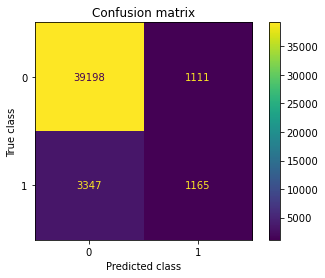

              precision    recall  f1-score   support

           0       0.92      0.97      0.95     40309
           1       0.51      0.26      0.34      4512

    accuracy                           0.90     44821
   macro avg       0.72      0.62      0.64     44821
weighted avg       0.88      0.90      0.89     44821

Mejores parámetros del modelo: {'objective': 'binary:logistic', 'use_label_encoder': True, 'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 1.0, 'enable_categorical': False, 'gamma': 0.1, 'gpu_id': -1, 'importance_type': None, 'interaction_constraints': '', 'learning_rate': 0.300000012, 'max_delta_step': 0, 'max_depth': 10, 'min_child_weight': 5, 'missing': nan, 'monotone_constraints': '()', 'n_estimators': 100, 'n_jobs': 12, 'num_parallel_tree': 1, 'predictor': 'auto', 'random_state': 1, 'reg_alpha': 0.5, 'reg_lambda': 0.3, 'scale_pos_weight': 1, 'subsample': 0.55, 'tree_method': 'exact', 'validate_paramete

In [171]:
# Importación y definición de modelo XGBRegressor
xgbPrimer = XGBClassifier(
     objective = objective,
     seed = seed,
     n_estimators = n_estimators,
     max_depth = max_depth,
     min_child_weight = min_child_weight,
     learning_rate = learning_rate,
     gamma = gamma,
     subsample = subsample,
     colsample_bytree = colsample_bytree,
     reg_alpha = reg_alpha,
     reg_lambda = reg_lambda,
     silent = False,
     eval_metric = eval_metric,
     random_state=random_state
    
 )

# Entrenamiento (fit) y desempeño del modelo XGBClassifier
xgbPrimer.fit(X_train, y_train)
y_pred_primer = xgbPrimer.predict(X_test)


#Imprimir Resultados
test_score = recall_score(y_test, y_pred_primer)
print('Recall en el conjunto de prueba:', test_score)
mostrar_resultados(y_test, y_pred_primer)

# Imprimir los mejores hiperparámetros y los parámetros correspondientes del modelo
print('Mejores parámetros del modelo:', xgbPrimer.get_params())

In [172]:
y_pred_primer

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

## Paso 5: Calibración parametros learning_rate y n_estimators

In [173]:
cv_params = {'learning_rate': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3],
             'n_estimators': [50, 100, 200]
}

gbm = GridSearchCV(XGBClassifier(
                                        objective = objective,
                                        seed = seed,
                                        n_estimators = n_estimators,
                                        max_depth = max_depth,
                                        min_child_weight = min_child_weight,
                                        learning_rate = learning_rate,
                                        gamma = gamma,
                                        colsample_bytree = colsample_bytree,
                                        subsample = subsample,
                                        verbosity = verbosity,
                                        eval_metric = eval_metric,
                                        random_state=random_state
                                    ),
                   
                    param_grid = cv_params,
                    scoring = "recall",
                    cv = 5,
                    verbose = True
)

gbm.fit(X_train, y_train)
print(gbm.cv_results_)
print("Best parameters %s" %gbm.best_params_)
print("Best score %s" %gbm.best_score_)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass 

C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass 

C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass 

C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass 

C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass 

C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass 

C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass 

C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass 

C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass 

{'mean_fit_time': array([ 2.44398227,  4.53648906,  9.35010409,  2.43844752,  4.78398838,
        9.34155345,  2.59237752,  5.11866374, 10.16608605,  2.49103727,
        4.94562545,  9.6272965 ,  2.39535432,  4.75241647,  9.6463048 ,
        2.47871623,  4.7947607 ,  9.56111479]), 'std_fit_time': array([0.20070786, 0.04088135, 0.08814693, 0.04525503, 0.1399173 ,
       0.09537025, 0.17338185, 0.31085194, 0.29672252, 0.04770664,
       0.13608473, 0.32547615, 0.02843469, 0.0299407 , 0.13604913,
       0.06874507, 0.06673187, 0.10778844]), 'mean_score_time': array([0.01850457, 0.0256022 , 0.03861003, 0.01831679, 0.02670774,
       0.04070907, 0.01713276, 0.02740808, 0.04331031, 0.0183125 ,
       0.03061199, 0.04143381, 0.01820383, 0.02671027, 0.04421234,
       0.01800499, 0.02580996, 0.0404181 ]), 'std_score_time': array([0.00228061, 0.00205933, 0.00259711, 0.00051401, 0.00156918,
       0.00275089, 0.00147819, 0.00079921, 0.00399555, 0.00160387,
       0.00646258, 0.00350294, 0.001166

### Establece óptimos temporales para learning_rate y n_estimators

In [174]:
learning_rate = gbm.best_params_['learning_rate']
n_estimators = gbm.best_params_['n_estimators']
parameters['learning_rate'] = learning_rate
parameters['n_estimators'] = n_estimators
scores.append(gbm.best_score_)

In [175]:
### Calibración de learning_rate y n_estimators

In [176]:
cv_params = {'learning_rate': [learning_rate*0.2, learning_rate*0.5, learning_rate, learning_rate*2, learning_rate*5],
             'n_estimators': [(n_estimators*3/4), n_estimators, n_estimators*5/4]
             
            }           
gbm = GridSearchCV(XGBClassifier(
                                        objective = objective,
                                        seed = seed,
                                        n_estimators = n_estimators,
                                        max_depth = max_depth,
                                        min_child_weight = min_child_weight,
                                        learning_rate = learning_rate,
                                        gamma = gamma,
                                        colsample_bytree = colsample_bytree,
                                        subsample = subsample,
                                        verbosity = verbosity,
                                        eval_metric = eval_metric,
                                        random_state=random_state
                                    ),
                   
                    param_grid = cv_params,
                    scoring = "recall",
                    cv = 5,
                    verbose = True
)

gbm.fit(X_train, y_train)
print(gbm.cv_results_)
print("Best parameters %s" %gbm.best_params_)
print("Best score %s" %gbm.best_score_)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass 

C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isin

C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isin

C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isin

C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Usuario\anaconda3\envs\MIAD\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isin

{'mean_fit_time': array([0.02485805, 9.77998734, 0.0264061 , 0.02731428, 9.68907552,
       0.02501292, 0.02533484, 9.45393386, 0.02570944, 0.03082056,
       9.66134572, 0.02420559, 0.0258018 , 8.74110589, 0.02360516]), 'std_fit_time': array([1.39371326e-03, 3.18232376e-01, 1.35695825e-03, 2.68492719e-03,
       1.28613816e-01, 1.10913771e-03, 1.17661274e-03, 8.05100595e-02,
       1.16940822e-03, 1.11027507e-02, 5.21679375e-01, 7.48417431e-04,
       9.87048191e-04, 2.47237031e-01, 4.89920871e-04]), 'mean_score_time': array([0.        , 0.04291229, 0.        , 0.        , 0.04391608,
       0.        , 0.        , 0.04622717, 0.        , 0.        ,
       0.03883014, 0.        , 0.        , 0.0437109 , 0.        ]), 'std_score_time': array([0.        , 0.00351428, 0.        , 0.        , 0.00403274,
       0.        , 0.        , 0.00412354, 0.        , 0.        ,
       0.00128185, 0.        , 0.        , 0.00460213, 0.        ]), 'param_learning_rate': masked_array(data=[0.06, 0.

### Establece óptimos definitivos para learning_rate y n_estimators

In [177]:
learning_rate = gbm.best_params_['learning_rate']
n_estimators = gbm.best_params_['n_estimators']
parameters['learning_rate'] = learning_rate
parameters['n_estimators'] = n_estimators
scores.append(gbm.best_score_)

In [178]:
print(parameters)
print(scores)

{'max_depth': 10, 'min_child_weight': 5, 'gamma': 0.1, 'subsample': 0.55, 'colsample_bytree': 1.0, 'reg_alpha': 0.5, 'reg_lambda': 0.3, 'learning_rate': 1.5, 'n_estimators': 200}
[0.2168759544212485, 0.2230958626062222, 0.22713492568319288, 0.16623189130854282, 0.24950870384532003, 0.25081868795517404, 0.2616247614691357, 0.2616247614691357, 0.28039717026755956, 0.3457766040828384]


Recall en el conjunto de prueba: 0.35150709219858156


<Figure size 432x432 with 0 Axes>

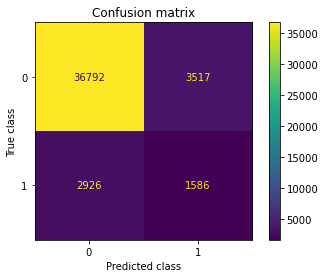

              precision    recall  f1-score   support

           0       0.93      0.91      0.92     40309
           1       0.31      0.35      0.33      4512

    accuracy                           0.86     44821
   macro avg       0.62      0.63      0.62     44821
weighted avg       0.86      0.86      0.86     44821

Mejores parámetros del modelo: {'objective': 'binary:logistic', 'use_label_encoder': True, 'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 1.0, 'enable_categorical': False, 'gamma': 0.1, 'gpu_id': -1, 'importance_type': None, 'interaction_constraints': '', 'learning_rate': 1.5, 'max_delta_step': 0, 'max_depth': 10, 'min_child_weight': 5, 'missing': nan, 'monotone_constraints': '()', 'n_estimators': 200, 'n_jobs': 12, 'num_parallel_tree': 1, 'predictor': 'auto', 'random_state': 1, 'reg_alpha': 0.5, 'reg_lambda': 0.3, 'scale_pos_weight': 1, 'subsample': 0.55, 'tree_method': 'exact', 'validate_parameters': 1, 

In [179]:
# Importación y definición de modelo XGBRegressor
xgbsegundo = XGBClassifier(
     objective = objective,
     seed = seed,
     n_estimators = n_estimators,
     max_depth = max_depth,
     min_child_weight = min_child_weight,
     learning_rate = learning_rate,
     gamma = gamma,
     subsample = subsample,
     colsample_bytree = colsample_bytree,
     reg_alpha = reg_alpha,
     reg_lambda = reg_lambda,
     silent = False,
     eval_metric = eval_metric,
     random_state=random_state
 
 )

# Entrenamiento (fit) y desempeño del modelo XGBClassifier
xgbsegundo.fit(X_train, y_train)
y_pred_segundo = xgbsegundo.predict(X_test)

#Imprimir Resultados
test_score_segundo = recall_score(y_test, y_pred_segundo)
print('Recall en el conjunto de prueba:', test_score_segundo)
mostrar_resultados(y_test, y_pred_segundo)

# Imprimir los mejores hiperparámetros y los parámetros correspondientes del modelo
print('Mejores parámetros del modelo:', xgbsegundo.get_params())